### Wazibia Student Performace Dataset

Code that scored well on the Leaderboard during Data Science Nigeria Bootcamp

The approach used include Feature Selection on the __most Correlated variables__ against the label, and __Ensemble Models__

### A. Read Train and Test DataSets

In [3]:
import pandas as pd
pd.set_option("max_columns", 200)
pd.set_option("max_rows", 200)

def readFile(file=None, drop_column=None):
    """
    read csv file and drop columns that doesn't exist in both train and test data
    """
    import pandas as pd
    data = pd.read_csv(file)
    try:
        data.drop(drop_column, inplace=True, axis=1)
    except ValueError:
        print("An Exception was caught; Column None is not in dataFrame")
        pass
    print(data.shape)
    #print(data.head())
    return data

train = readFile(file="train.csv", drop_column="Gender")
test = readFile(file="test.csv")

(325, 22)
An Exception was caught; Column None is not in dataFrame
(323, 21)


In [4]:
train.head(10)

,S/N,Age,Location,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,famrel,freetime,health,absences,Score
0,1,13,U,GT3,A,4,4,2,2,0,yes,no,no,no,yes,yes,no,4,3,3,4,22
1,2,12,U,GT3,T,1,1,1,2,0,no,yes,no,no,no,yes,yes,5,3,3,2,31
2,3,10,U,LE3,T,1,1,1,2,0,yes,no,no,no,yes,yes,yes,4,3,3,6,37
3,4,10,U,GT3,T,4,2,1,3,0,no,yes,no,yes,yes,yes,yes,3,2,5,0,42
4,5,11,U,GT3,T,3,3,1,2,0,no,yes,no,no,yes,yes,no,4,3,5,0,37
5,6,11,U,LE3,T,4,3,1,2,0,no,yes,no,yes,yes,yes,yes,5,4,5,6,37
6,7,11,U,LE3,T,2,2,1,2,0,no,no,no,no,yes,yes,yes,4,4,3,0,38
7,8,12,U,GT3,A,4,4,2,2,0,yes,yes,no,no,yes,yes,no,4,1,1,2,36
8,9,10,U,LE3,A,3,2,1,2,0,no,yes,no,no,yes,yes,yes,4,2,1,0,48
9,10,10,U,GT3,T,3,4,1,2,0,no,yes,no,yes,yes,yes,yes,5,5,5,0,37


In [5]:
test.head(10)

,S/N,Age,Location,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,famrel,freetime,health,absences
0,327,12,U,LE3,A,3,2,1,1,0,no,no,no,no,yes,yes,yes,4,4,3,18
1,328,13,R,LE3,T,1,1,2,4,0,no,yes,no,yes,yes,yes,no,5,2,3,2
2,329,13,U,GT3,T,1,1,2,2,0,yes,no,no,yes,yes,yes,yes,5,4,4,0
3,330,12,U,GT3,T,2,2,1,2,0,no,yes,no,no,no,yes,yes,5,4,5,12
4,331,13,U,GT3,T,2,1,2,2,0,no,no,no,yes,yes,yes,yes,4,3,5,10
5,332,12,U,GT3,T,1,1,1,2,0,no,no,no,no,no,yes,yes,4,3,4,0
6,333,13,U,GT3,T,2,2,1,3,0,no,yes,no,no,yes,yes,yes,4,3,2,0
7,334,12,U,GT3,T,1,1,1,3,0,no,yes,no,no,yes,yes,yes,4,3,3,0
8,335,13,U,GT3,T,2,1,1,3,0,no,no,no,yes,yes,yes,yes,4,2,2,0
9,336,13,U,LE3,A,4,4,1,2,0,no,yes,no,yes,yes,yes,yes,5,4,2,0


### B. Extract Categorical and Numerical DataSets Differently for Easy Evaluation of Correlated Variables

In [6]:
idx = train['S/N'] #Save train and test, cos they will be dropped for training.

#Work with the train Dataset:
#Seperate the categorical and numerical
def extractData(data):
    """
    Seperate the datasets int numerical and non-numerical datasets
    """
    catData = data.select_dtypes(include=["object"])
    numData = data.select_dtypes(exclude=["object"])
    print("Columns with Categorical Data {}".format(catData.columns))
    print("Columns with Numerical Data {}".format(numData.columns))
    return catData, numData

catTrain, numTrain = extractData(train)
catTest, numTest = extractData(test)

Columns with Categorical Data Index(['Location', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet'],
      dtype='object')
Columns with Numerical Data Index(['S/N', 'Age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
       'famrel', 'freetime', 'health', 'absences', 'Score'],
      dtype='object')
Columns with Categorical Data Index(['Location', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet'],
      dtype='object')
Columns with Numerical Data Index(['S/N', 'Age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
       'famrel', 'freetime', 'health', 'absences'],
      dtype='object')


In [7]:
numTrain.drop("S/N", axis=1, inplace=True)
numTrain.describe()

C:\Users\ADEKUNLE\Anaconda3_2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,health,absences,Score
count,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000
mean,11.320000,2.710769,2.476923,1.449231,1.956923,0.184615,3.926154,3.178462,3.590769,4.341538,35.713846
std,1.123157,1.086977,1.093015,0.725234,0.819133,0.579812,0.913256,0.987029,1.438634,5.200038,6.732175
min,10.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,20.000000
25%,10.000000,2.000000,2.000000,1.000000,1.000000,0.000000,3.000000,3.000000,3.000000,0.000000,31.000000
50%,11.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,4.000000,2.000000,36.000000
75%,12.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,5.000000,6.000000,40.000000
max,17.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,32.000000,53.000000


### C. Check Correlation of Numerical Datasets

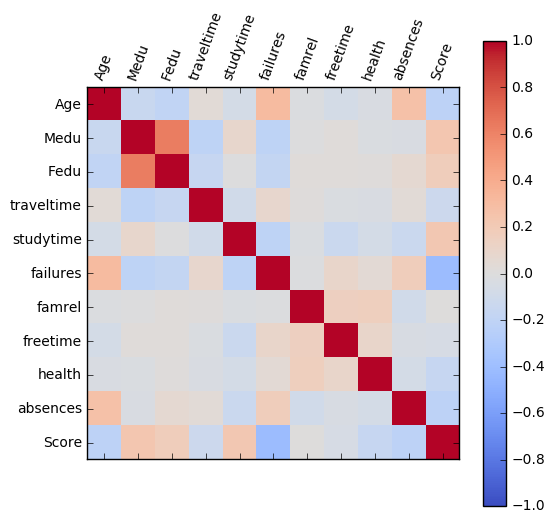

In [8]:
def corr_matrix(numData):
    """
    Takes the Numerical Datasets and do a correlation matrix map on it
    """
    import matplotlib
    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    
    corr = numData.corr()
    fig, ax = plt.subplots(figsize=(6, 6))
    show = ax.matshow(corr, cmap = cm.coolwarm, vmin=-1, vmax=1) #Needed to cast this into a variable for plt.colorbar use
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=70)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.colorbar(show)
    plt.show()
    return corr

corrNumTrain = corr_matrix(numTrain)

The Image Above shows that Variables with deep Red or deep Blue colors have good correlation with the Score and should be important in predicting the label variable in this case Score. More so we can print out the value of the Correlation matrix and see how the correlation played out in terms of values

In [9]:
corrNumTrain

,Age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,health,absences,Score
Age,1.000000,-0.146428,-0.192583,0.035163,-0.068840,0.307116,-0.019017,-0.062809,-0.033313,0.270823,-0.218478
Medu,-0.146428,1.000000,0.625634,-0.210531,0.089956,-0.203949,-0.002927,0.019491,-0.030529,-0.032706,0.234127
Fedu,-0.192583,0.625634,1.000000,-0.162093,-0.004561,-0.178322,0.019931,0.018134,0.008697,0.059223,0.173798
traveltime,0.035163,-0.210531,-0.162093,1.000000,-0.092015,0.081078,0.008302,-0.030421,-0.036245,0.037758,-0.123410
studytime,-0.068840,0.089956,-0.004561,-0.092015,1.000000,-0.210651,-0.024894,-0.127890,-0.070006,-0.129136,0.219394
failures,0.307116,-0.203949,-0.178322,0.081078,-0.210651,1.000000,-0.009147,0.098652,0.046451,0.174544,-0.408658
famrel,-0.019017,-0.002927,0.019931,0.008302,-0.024894,-0.009147,1.000000,0.155049,0.160162,-0.086311,0.007596
freetime,-0.062809,0.019491,0.018134,-0.030421,-0.127890,0.098652,0.155049,1.000000,0.095062,-0.046790,-0.050816
health,-0.033313,-0.030529,0.008697,-0.036245,-0.070006,0.046451,0.160162,0.095062,1.000000,-0.064186,-0.157126
absences,0.270823,-0.032706,0.059223,0.037758,-0.129136,0.174544,-0.086311,-0.046790,-0.064186,1.000000,-0.216112


### D. Drop Variables with Least Correlation

In [10]:
#Removing the Least Uncorrelated Values
numTrainUncorr = numTrain.drop(["famrel", "freetime"], axis=1)
numTestUncorr = numTest.drop(["famrel", "freetime"], axis=1)

### E. Prepare Categorical Variables into Dummy Varibles and Evaluate its Correlation Matrix.

In [11]:
#Make a copy of the categorical Datasets and concat Score with it for the sake of Correlation
catTrainRF = catTrain.copy()
catTestRF = catTest.copy()
catTrainRF['Score'] = numTrain['Score']
catTestRF['Score'] = numTrain['Score']

def prepareCategorical(fullData, trainDF, testDF, label=None, offcolumns=None):
    """
    fullData == use to extract label in case you want to train only Categorical datasets
    trainDF == Training Categorical Sets
    testDF == Test Categorical Sets
    label == label column
    offcolumns == other columns to remove before converting to dummies, 
                could be a list of columns or a string of one column
    """
    
    import pandas as pd
    
    
    labelDF = fullData[label]
    #trainDF = trainDF.drop(label, axis=1)
    idx = trainDF.shape[0]
    joinedDF = pd.concat([trainDF, testDF], ignore_index=True)
    joinedDF = joinedDF.drop(offcolumns, axis=1)
    joinedDF = pd.get_dummies(joinedDF, prefix=list(joinedDF.columns))
    trainDF = joinedDF.iloc[:idx, :]
    testDF = joinedDF.iloc[idx:, :]
    trainDF[label] = labelDF
    return trainDF, testDF

catTrainDF, catTestDF = prepareCategorical(train, catTrainRF, catTestRF, label='Score', offcolumns='Score')

C:\Users\ADEKUNLE\Anaconda3_2\lib\site-packages\ipykernel\__main__.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [12]:
catTrainDF.head()

,Location_R,Location_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,Score
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,22
1,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,31
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,37
3,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,42
4,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,37


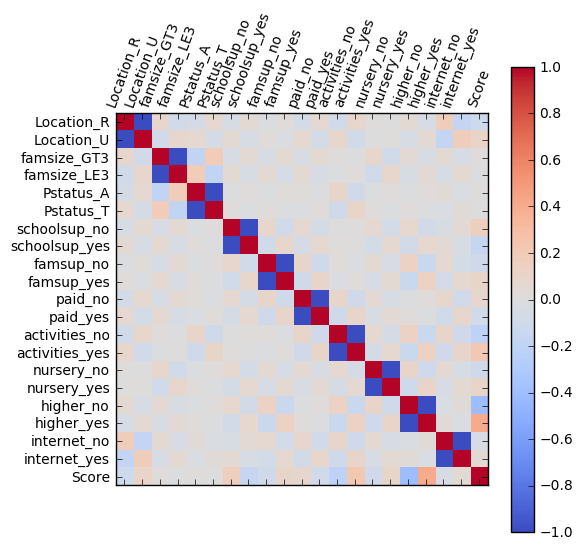

In [13]:
check = corr_matrix(catTrainDF)

### F. Select Columns that are quite important to the Score in Correlation

In [14]:
colToSelect = ['Location_R', 'Location_U', 'schoolsup_no', 'schoolsup_yes', 'activities_no', 'activities_yes', 'higher_no', 'higher_yes', 'Score']
catTrainDFMoreCorr = catTrainDF.loc[:, colToSelect]
catTestDFMoreCorr = catTestDF.loc[:, colToSelect[:-1]]

A Note: Predictions were made on the Numerical Variables with the most Correlated Variables and Categorical Variables with the most Correlated. Both scored 9.5535, and 10.1256 respectively on public leaderboad

### G. Concatenate the most important Variables from the Categorical Variables and Numerical Variable

In [15]:
def mergeCatNum(numData, catData, label=None):
    import pandas as pd
    
    if label in catData.columns:
        catData = catData.drop(label, axis=1)
    else:
        pass
    mergeData = pd.concat([catData, numData], axis=1)
    return mergeData

mergedTrainUncorr = mergeCatNum(numTrainUncorr, catTrainDFMoreCorr, label="Score")

In [17]:
mergedTrainUncorr.head()

,Location_R,Location_U,schoolsup_no,schoolsup_yes,activities_no,activities_yes,higher_no,higher_yes,Age,Medu,Fedu,traveltime,studytime,failures,health,absences,Score
0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,13,4,4,2,2,0,3,4,22
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,12,1,1,1,2,0,3,2,31
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,10,1,1,1,2,0,3,6,37
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,10,4,2,1,3,0,5,0,42
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,11,3,3,1,2,0,5,0,37


In [21]:
catTestDFMoreCor = catTestDFMoreCorr.reset_index(drop=True)

mergedTestUncorr = mergeCatNum(numTestUncorr, catTestDFMoreCor,label="Score")
mergedTestUncorr.head()

,Location_R,Location_U,schoolsup_no,schoolsup_yes,activities_no,activities_yes,higher_no,higher_yes,S/N,Age,Medu,Fedu,traveltime,studytime,failures,health,absences
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,327,12,3,2,1,1,0,3,18
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,328,13,1,1,2,4,0,3,2
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,329,13,1,1,2,2,0,4,0
3,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,330,12,2,2,1,2,0,5,12
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,331,13,2,1,2,2,0,5,10


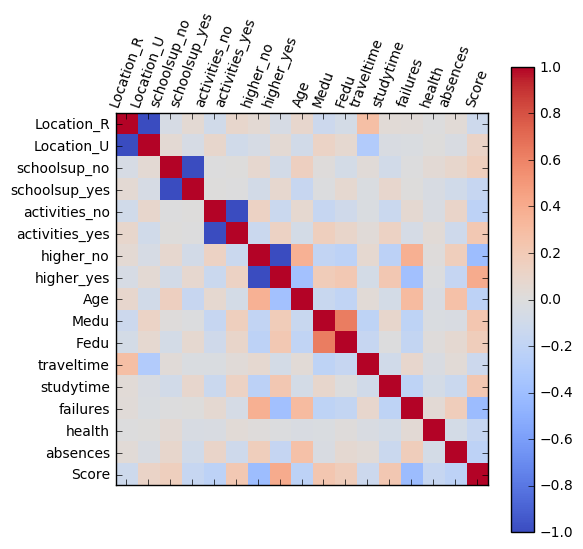

In [18]:
idxTest = test["S/N"]
#numTest.drop("S/N", inplace=True, axis=1)

#sns.set_style("whitegrid")
mergedcorr = corr_matrix(mergedTrainUncorr)

From the Above Image, all the Variables now have a very good level of Correlation with Score.

In [20]:
mergedcorr

,Location_R,Location_U,schoolsup_no,schoolsup_yes,activities_no,activities_yes,higher_no,higher_yes,Age,Medu,Fedu,traveltime,studytime,failures,health,absences,Score
Location_R,1.000000,-1.000000,-0.051917,0.051917,-0.086256,0.086256,0.051744,-0.051744,0.083447,-0.121637,-0.069873,0.285257,0.034758,0.026344,-0.002463,0.032852,-0.111883
Location_U,-1.000000,1.000000,0.051917,-0.051917,0.086256,-0.086256,-0.051744,0.051744,-0.083447,0.121637,0.069873,-0.285257,-0.034758,-0.026344,0.002463,-0.032852,0.111883
schoolsup_no,-0.051917,0.051917,1.000000,-1.000000,-0.006051,0.006051,0.074181,-0.074181,0.154474,0.015157,-0.063063,0.027354,-0.084559,-0.005799,0.039265,0.090137,0.159973
schoolsup_yes,0.051917,-0.051917,-1.000000,1.000000,0.006051,-0.006051,-0.074181,0.074181,-0.154474,-0.015157,0.063063,-0.027354,0.084559,0.005799,-0.039265,-0.090137,-0.159973
activities_no,-0.086256,0.086256,-0.006051,0.006051,1.000000,-1.000000,0.125892,-0.125892,0.069897,-0.161585,-0.098511,-0.027075,-0.130846,0.059281,-0.034228,0.106110,-0.212626
activities_yes,0.086256,-0.086256,0.006051,-0.006051,-1.000000,1.000000,-0.125892,0.125892,-0.069897,0.161585,0.098511,0.027075,0.130846,-0.059281,0.034228,-0.106110,0.212626
higher_no,0.051744,-0.051744,0.074181,-0.074181,0.125892,-0.125892,1.000000,-1.000000,0.371974,-0.180876,-0.214566,0.066959,-0.225169,0.375633,0.011134,0.167775,-0.406195
higher_yes,-0.051744,0.051744,-0.074181,0.074181,-0.125892,0.125892,-1.000000,1.000000,-0.371974,0.180876,0.214566,-0.066959,0.225169,-0.375633,-0.011134,-0.167775,0.406195
Age,0.083447,-0.083447,0.154474,-0.154474,0.069897,-0.069897,0.371974,-0.371974,1.000000,-0.146428,-0.192583,0.035163,-0.068840,0.307116,-0.033313,0.270823,-0.218478
Medu,-0.121637,0.121637,0.015157,-0.015157,-0.161585,0.161585,-0.180876,0.180876,-0.146428,1.000000,0.625634,-0.210531,0.089956,-0.203949,-0.030529,-0.032706,0.234127


### H. Create Cross Validation Datasets and Train a Random Forest
The Predictions from the training are evaluated against a Cross Validated Datasets and the Root Mean Square Error Observed. This helps us see how well how model does. Note also that there is a level of hyperparameter tunning using GridSearch over cross validation on the training Datasets.
Simplifying the approach:
a. Hold out a Cross Validated Dataset for Comparison of our best model based on hyper parameter tunning
b. Do training over many Cross Validated portions of the remaining trian Dataset to pick the best parameter that gave a robust prediction.
c. Evaluate it's error on the held out cross validated Dataset

In [23]:
#Train RandomForest on all values then Correlated Values
def createCV(data, label=None, random=0):
    """
    Creates train and cross-validation datasets
    data = Dataset to split
    label= Label of dataset
    random = random_state for constant values
    """
    from sklearn.model_selection import train_test_split
    dataLabel = data[label]
    columns = data.columns.tolist()
    columns.remove(label)
    dataX = data.loc[:, columns]
    trainX, CVX, trainY, CVY = train_test_split(dataX, dataLabel, test_size=0.4, random_state=random)
    return trainX, CVX, trainY, CVY

numTrainX, numCVX, numTrainY, numCVY = createCV(mergedTrainUncorr, label="Score")

def trainRFRegression(trainX, CVX, trainY, CVY):
    
    """
    Train Dataset with lightGBM
    
    """
    from sklearn.model_selection import GridSearchCV
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import mean_squared_error
    import numpy as np
    
    params = {'n_estimators':[10,20,30], 'max_depth': [2,3,4,5,6]}
    
    rf = RandomForestRegressor()
    grid = GridSearchCV(rf, params, cv=5)
    grid.fit(trainX, trainY)
    print("The Mean Absolute Error is {}".format(mean_absolute_error(CVY, grid.best_estimator_.predict(CVX))))
    print("The Root Mean Square Error is {}".format(np.sqrt(
        mean_squared_error(CVY, grid.best_estimator_.predict(CVX)))))
    return grid

modelRF = trainRFRegression(numTrainX, numCVX, numTrainY, numCVY )

The Mean Absolute Error is 4.504158541748444
The Root Mean Square Error is 5.792936621115168


### H. Building Ensemble Model
What the ensemble model does is to build a more Robust Predictions that one can be pretty confident will generalize well. 

In [24]:
#Model 1
def trainRFEnsemble(trainX, trainY):
    
    """
    Train Dataset with lightGBM
    
    """
    from sklearn.model_selection import GridSearchCV
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import mean_squared_error
    import numpy as np
    
    params = {'n_estimators':[10,20,30], 'max_depth': [2,3,4,5,6]}
    
    rf = RandomForestRegressor()
    grid = GridSearchCV(rf, params, cv=5)
    grid.fit(trainX, trainY)
    return grid


#Model 2
def trainENetEnsemble(trainX, trainY):
    
    """
    Train Dataset with lightGBM
    
    """
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import ElasticNetCV
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import mean_squared_error
    import numpy as np
    
    params = {"l1_ratio": [0.5, 0.4, 0.2, 0.6], "eps": [0.001, 0.002, 0.01, 0.005], "n_alphas": [100, 200, 300, 50]}
    
    elnet = ElasticNetCV()
    grid = GridSearchCV(elnet, params, cv=5)
    grid.fit(trainX, trainY)
    return grid





#Model 3 ExtraTreeRegressor
def trainETreeEnsemble(trainX, trainY):
    
    """
    Train Dataset with lightGBM
    
    """
    from sklearn.model_selection import GridSearchCV
    from sklearn.ensemble import ExtraTreesRegressor
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import mean_squared_error
    import numpy as np
    
    params = {'n_estimators':[10,20,30], 'max_depth': [2,3,4,5,6]}
    
    etr = ExtraTreesRegressor()
    grid = GridSearchCV(etr, params, cv=5)
    grid.fit(trainX, trainY)
    return grid


#Model 4 Light Gradient Boosting 
def trainLGBEnsemble(trainX, trainY):
    
    """
    Train Dataset with lightGBM
    
    """
    from sklearn.model_selection import GridSearchCV
    from lightgbm import LGBMRegressor
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import mean_squared_error
    import numpy as np
    
    params = {'min_child_weight':[4,5], 'subsample':[i/10.0 for i in range(6,11)],
              'colsample_bytree':[i/10.0 for i in range(6,11)], 'max_depth': [2,3,4]}
    
    lgb = LGBMRegressor(n_jobs=1) 
    grid = GridSearchCV(lgb, params, cv=5)
    grid.fit(trainX, trainY)
    return grid

Create a particular number of Folds to work with

In [25]:
from sklearn.cross_validation import KFold

n_train = mergedTrainUncorr.shape[0]
n_fold = 4
seed = 123
kf = KFold(n_train, n_folds= n_fold, random_state=seed, shuffle=True)

C:\Users\ADEKUNLE\Anaconda3_2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [27]:
x_train = mergedTrainUncorr.loc[:, :'absences']
y_train = mergedTrainUncorr['Score']

In [30]:
mergedTestUncorr.shape, mergedTrainUncorr.shape

((323, 17), (325, 17))

In [32]:
mergedTestUncorr.drop('S/N', axis=1, inplace=True)

In [37]:
list(mergedTestUncorr.columns) == list(x_train.columns)

True

In [38]:
#Random Forest Predicions


import numpy as np
ntrain= mergedTrainUncorr.shape[0]
ntest = mergedTestUncorr.shape[0]

oof_train = np.zeros((ntrain,))
oof_test = np.zeros((ntest,))
oof_test_skf = np.empty((n_fold, ntest))

for i, (train_index, test_index) in enumerate(kf):
        x_tr = x_train.iloc[train_index, :]
        y_tr = y_train[train_index]
        x_te = x_train.iloc[test_index, :]

        grid = trainRFEnsemble(x_tr, y_tr)

        oof_train[test_index] = grid.best_estimator_.predict(x_te)
        oof_test_skf[i, :] = grid.best_estimator_.predict(mergedTestUncorr)
oof_test[:] = oof_test_skf.mean(axis=0)
print('Done')

In [39]:
#Elastic Net Predictions

import numpy as np
ntrain= mergedTrainUncorr.shape[0]
ntest = mergedTestUncorr.shape[0]

oof_train1 = np.zeros((ntrain,))
oof_test1 = np.zeros((ntest,))
oof_test_skf1 = np.empty((n_fold, ntest))

for i, (train_index, test_index) in enumerate(kf):
        x_tr = x_train.iloc[train_index, :]
        y_tr = y_train[train_index]
        x_te = x_train.iloc[test_index, :]

        grid = trainENetEnsemble(x_tr, y_tr)

        oof_train1[test_index] = grid.best_estimator_.predict(x_te)
        oof_test_skf1[i, :] = grid.best_estimator_.predict(mergedTestUncorr)
oof_test1[:] = oof_test_skf1.mean(axis=0)
print('Done')

Done


In [40]:
# Extra Tree Ensemble
ntrain= mergedTrainUncorr.shape[0]
ntest = mergedTestUncorr.shape[0]

oof_train2 = np.zeros((ntrain,))
oof_test2 = np.zeros((ntest,))
oof_test_skf2 = np.empty((n_fold, ntest))

for i, (train_index, test_index) in enumerate(kf):
        x_tr = x_train.iloc[train_index, :]
        y_tr = y_train[train_index]
        x_te = x_train.iloc[test_index, :]

        grid = trainETreeEnsemble(x_tr, y_tr)

        oof_train2[test_index] = grid.best_estimator_.predict(x_te)
        oof_test_skf2[i, :] = grid.best_estimator_.predict(mergedTestUncorr)
oof_test2[:] = oof_test_skf2.mean(axis=0)
print('Done')

Done


In [41]:
#Light Gradient Boosting
ntrain= mergedTrainUncorr.shape[0]
ntest = mergedTestUncorr.shape[0]

oof_train3 = np.zeros((ntrain,))
oof_test3 = np.zeros((ntest,))
oof_test_skf3 = np.empty((n_fold, ntest))

for i, (train_index, test_index) in enumerate(kf):
        x_tr = x_train.iloc[train_index, :]
        y_tr = y_train[train_index]
        x_te = x_train.iloc[test_index, :]

        grid = trainLGBEnsemble(x_tr, y_tr)

        oof_train3[test_index] = grid.best_estimator_.predict(x_te)
        oof_test_skf3[i, :] = grid.best_estimator_.predict(mergedTestUncorr)
oof_test3[:] = oof_test_skf3.mean(axis=0)
print('Done')

Done


### I. Create a New Training And Test Datasets from the Result of the Predictions from each Model

In [43]:
#Build the Ensemble
#Base Prediction for Training DataSets
basePrediction = pd.DataFrame( {'RandomForest': oof_train.ravel(),
     'ExtraTrees': oof_train2.ravel(),
     'ElasticNet': oof_train1.ravel(),
      'LGBEnsemble': oof_train3.ravel()
    })

basePrediction.head()

,ElasticNet,ExtraTrees,LGBEnsemble,RandomForest
0,33.693870,34.591025,35.824264,36.228548
1,36.962868,37.095284,36.875714,37.831257
2,33.247933,36.113183,35.617334,34.913758
3,38.901249,37.387017,36.973121,37.990247
4,36.812765,37.447468,35.263419,35.922363


In [42]:
#Base Prediction Test Datasets
baseTest = pd.DataFrame( {'RandomForest': oof_test.ravel(),
     'ExtraTrees': oof_test2.ravel(),
     'ElasticNet': oof_test1.ravel(),
      'LGBEnsemble': oof_test3.ravel()
    })

baseTest.head()

,ElasticNet,ExtraTrees,LGBEnsemble,RandomForest
0,33.905579,36.923430,35.035139,34.898362
1,37.731063,37.677629,36.857357,37.231633
2,33.731575,34.234112,35.390389,34.802000
3,33.768103,36.526418,34.767667,34.535207
4,34.928439,37.066912,35.724233,35.477625


### J. Make Prediction

In [44]:
EnsembleTrain = basePrediction.copy()
EnsembleTrain['Score'] = y_train


numTrainX, numCVX, numTrainY, numCVY = createCV(EnsembleTrain, label="Score")
modelRF = trainRFRegression(numTrainX, numCVX, numTrainY, numCVY )

The Mean Absolute Error is 4.588681643611639
The Root Mean Square Error is 5.850829830333505


### I. Submit Prediction to Kaggle

In [46]:
def predictTest(model, testData, testids):
    import pandas as pd
    testY = model.best_estimator_.predict(testData)
    results_df = pd.DataFrame(data={'S/N':testids,'Score':testY})
    results_df.to_csv("Submission.csv", index=False)
    return results_df

results_df = predictTest(modelRF, baseTest, idxTest)

In [47]:
results_df.head(10)

,S/N,Score
0,327,33.879936
1,328,38.157058
2,329,32.601991
3,330,33.879936
4,331,35.917723
5,332,37.712854
6,333,38.530314
7,334,38.157058
8,335,38.998136
9,336,39.875683


With the Ensemble I tried with a couple of more different algorithms like training Light Gradient Boosting, Extra Tree and Elastic Net Regression on the results of the ensemble, they all did well on the public and Private Leaderboard with Private Scores within the top 10% Scores

### Confidently Ensembling models can give a more robust Algorithm.

__Check out other quick and dirty things tried in [here](https://github.com/adekunleba/WazobiaProject/blob/master/WazobiaBootCamp.ipynb)__

# THE END